## SGD

/home/prateek/anaconda3/envs/pydl/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1
    Train Loss: 0.10325897145948844
    Train Misclassifications : 1850/60000
    Train Classification error: 3.083333%
    Test Loss: 0.09455172345042229
    Test Misclassifications : 291/10000
    Test Classification error: 2.910000%

Epoch 2
    Train Loss: 0.07337141543505654
    Train Misclassifications : 1347/60000
    Train Classification error: 2.245000%
    Test Loss: 0.06598135307431222
    Test Misclassifications : 205/10000
    Test Classification error: 2.050000%

Epoch 3
    Train Loss: 0.06744576940017102
    Train Misclassifications : 1208/60000
    Train Classification error: 2.013333%
    Test Loss: 0.057615885883569716
    Test Misclassifications : 189/10000
    Test Classification error: 1.890000%

Epoch 4
    Train Loss: 0.05489716946377234
    Train Misclassifications : 992/60000
    Train Classification error: 1.653333%
    Test Loss: 0.05218552611768246
    Test Misclassifications : 170/10000
    Test Classification error: 1.700000%

Epoch 5
    Train Lo

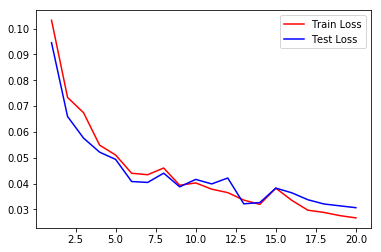

In [54]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 20
lr = 0.05
momentum = 0.5

seed = 1
log_interval = 10

torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=False)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        #if batch_idx % log_interval == 0:
        #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #        epoch, batch_idx * len(data), len(train_loader.dataset),
        #        100. * batch_idx / len(train_loader), loss.data[0]))
    model.train(False)

train_losses = []
test_losses = []

def test():
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in train_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    train_loss = loss/count
    train_losses.append(train_loss)
    print('    Train Loss: {}'.format(train_loss))
    print('    Train Misclassifications : {}/{}'.format(misclass, total))
    print('    Train Classification error: {:.6f}%'.format(100.*misclass/total))
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in test_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    test_loss = loss/count
    test_losses.append(test_loss)
    print('    Test Loss: {}'.format(test_loss))
    print('    Test Misclassifications : {}/{}'.format(misclass, total))
    print('    Test Classification error: {:.6f}%'.format(100.*misclass/total))
    print()
    pass

import matplotlib.pyplot as plt

epochslist = []

for epoch in range(1, epochs + 1):
    train(epoch)
    print('Epoch {}'.format(epoch))
    test()
    epochslist.append(epoch)
    
plt.plot(epochslist, train_losses, 'r-', label='Train Loss')
plt.plot(epochslist, test_losses, 'b-', label='Test Loss')
plt.legend()
plt.show()

## Adagrad

/home/prateek/anaconda3/envs/pydl/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1
    Train Loss: 0.12050352820050297
    Train Misclassifications : 2117/60000
    Train Classification error: 3.528333%
    Test Loss: 0.10866888910531998
    Test Misclassifications : 312/10000
    Test Classification error: 3.120000%

Epoch 2
    Train Loss: 0.09547010301076161
    Train Misclassifications : 1746/60000
    Train Classification error: 2.910000%
    Test Loss: 0.08540057726204395
    Test Misclassifications : 252/10000
    Test Classification error: 2.520000%

Epoch 3
    Train Loss: 0.08488239277489801
    Train Misclassifications : 1540/60000
    Train Classification error: 2.566667%
    Test Loss: 0.07481482364237309
    Test Misclassifications : 219/10000
    Test Classification error: 2.190000%

Epoch 4
    Train Loss: 0.07641585933085261
    Train Misclassifications : 1387/60000
    Train Classification error: 2.311667%
    Test Loss: 0.06792874373495579
    Test Misclassifications : 212/10000
    Test Classification error: 2.120000%

Epoch 5
    Train Lo

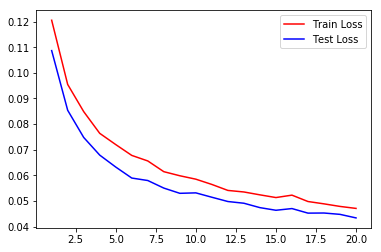

In [28]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 20
lr = 0.02

seed = 1
log_interval = 10

torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

optimizer = optim.Adagrad(model.parameters(), lr=lr)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        #if batch_idx % log_interval == 0:
        #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #        epoch, batch_idx * len(data), len(train_loader.dataset),
        #        100. * batch_idx / len(train_loader), loss.data[0]))
    model.train(False)

train_losses = []
test_losses = []

def test():
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in train_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    train_loss = loss/count
    train_losses.append(train_loss)
    print('    Train Loss: {}'.format(train_loss))
    print('    Train Misclassifications : {}/{}'.format(misclass, total))
    print('    Train Classification error: {:.6f}%'.format(100.*misclass/total))
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in test_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    test_loss = loss/count
    test_losses.append(test_loss)
    print('    Test Loss: {}'.format(test_loss))
    print('    Test Misclassifications : {}/{}'.format(misclass, total))
    print('    Test Classification error: {:.6f}%'.format(100.*misclass/total))
    print()
    pass

import matplotlib.pyplot as plt

epochslist = []

for epoch in range(1, epochs + 1):
    train(epoch)
    print('Epoch {}'.format(epoch))
    test()
    epochslist.append(epoch)
    
plt.plot(epochslist, train_losses, 'r-', label='Train Loss')
plt.plot(epochslist, test_losses, 'b-', label='Test Loss')
plt.legend()
plt.show()

## Adam

/home/prateek/anaconda3/envs/pydl/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1
    Train Loss: 0.14528262178733278
    Train Misclassifications : 2584/60000
    Train Classification error: 4.306667%
    Test Loss: 0.1346280977129936
    Test Misclassifications : 432/10000
    Test Classification error: 4.320000%

Epoch 2
    Train Loss: 0.1027864575840787
    Train Misclassifications : 1890/60000
    Train Classification error: 3.150000%
    Test Loss: 0.0943185530602932
    Test Misclassifications : 291/10000
    Test Classification error: 2.910000%

Epoch 3
    Train Loss: 0.08190704278771017
    Train Misclassifications : 1463/60000
    Train Classification error: 2.438333%
    Test Loss: 0.07532192021608353
    Test Misclassifications : 232/10000
    Test Classification error: 2.320000%

Epoch 4
    Train Loss: 0.07163590248892589
    Train Misclassifications : 1312/60000
    Train Classification error: 2.186667%
    Test Loss: 0.06699694283306598
    Test Misclassifications : 201/10000
    Test Classification error: 2.010000%

Epoch 5
    Train Loss:

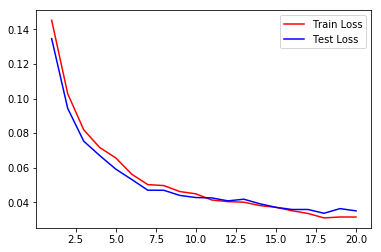

In [52]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 20
lr = 0.0005

seed = 1
log_interval = 10

torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

optimizer = optim.Adam(model.parameters(), lr=lr)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        #if batch_idx % log_interval == 0:
        #    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #       epoch, batch_idx * len(data), len(train_loader.dataset),
        #       100. * batch_idx / len(train_loader), loss.data[0]))
    model.train(False)

train_losses = []
test_losses = []

def test():
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in train_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    train_loss = loss/count
    train_losses.append(train_loss)
    print('    Train Loss: {}'.format(train_loss))
    print('    Train Misclassifications : {}/{}'.format(misclass, total))
    print('    Train Classification error: {:.6f}%'.format(100.*misclass/total))
    loss, count = 0.0, 0
    misclass, total = 0, 0
    for (data, target) in test_loader:
        output = model(Variable(data))
        loss = loss + F.nll_loss(output, Variable(target)).data[0]
        _, pred = torch.max(output.data, 1)
        misclass = misclass + len(target) - pred.eq(target).sum()
        total = total + len(target)
        count = count + 1
    test_loss = loss/count
    test_losses.append(test_loss)
    print('    Test Loss: {}'.format(test_loss))
    print('    Test Misclassifications : {}/{}'.format(misclass, total))
    print('    Test Classification error: {:.6f}%'.format(100.*misclass/total))
    print()
    pass

import matplotlib.pyplot as plt

epochslist = []

for epoch in range(1, epochs + 1):
    train(epoch)
    print('Epoch {}'.format(epoch))
    test()
    epochslist.append(epoch)
    
plt.plot(epochslist, train_losses, 'r-', label='Train Loss')
plt.plot(epochslist, test_losses, 'b-', label='Test Loss')
plt.legend()
plt.show()

## Answer 3a

Plots are shown above in the output.

I first predicted the values using the learnt model after every epoch and computed the average loss across all iterations in each epoch by calling the loss function over predicted and target values in train and cases individually and reported them. I stored all the train and test intermediate losses in a python list and plotted using matplotlib.

## Answer 3b

For SGD,<br>
Classification error on train set: 0.826667%<br>
Classification error on test set: 1.000000%<br>

I tried various configurations of SGD by modifying batch size, learning rate, momentum, etc. and I am reporting the configuration in which I found the classification error to be least. Hence the final model picked is good.
The code for computing classification error is
```py
loss, count = 0.0, 0
misclass, total = 0, 0 # Initialize to zero
for (data, target) in test_loader:
    output = model(Variable(data))
    loss = loss + F.nll_loss(output, Variable(target)).data[0]
    _, pred = torch.max(output.data, 1) # Calcuate the column index whose value is maximum
    misclass = misclass + len(target) - pred.eq(target).sum() # Add misclassifications
    total = total + len(target) # Add total seen in this iteration
    count = count + 1
test_loss = loss/count
test_losses.append(test_loss)
print('    Test Loss: {}'.format(test_loss))
# Report misclassification and classification error
print('    Test Misclassifications : {}/{}'.format(misclass, total))
print('    Test Classification error: {:.6f}%'.format(100.*misclass/total))
print()
```

## Answer 3c

Adagrad was easy to configure as it has only few parameters batch size, learning rate, lr_decay, weight_decay to be tuned, next SGD and least easy was Adam which had max parameters. The classification error obtained by all the three optimizations are listed below.

| Optimization | Classification Error on Train set | Classification Error on Test set |
| --- | --- | --- |
| SGD | 0.826667% | 1.000000% |
| Adagrad | 1.411667% | 1.370000% |
| Adam | 0.935000% | 1.030000% |